<a href="https://colab.research.google.com/github/manojsham4603/step-2023-ml-dl/blob/main/cifar_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#To upload the Dataset
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from keras import backend as K
#for model Building
#Sequential is to build the model layer by layer
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
#Dense is used to represents fully connected Layer
from keras.layers import Dense, Dropout, Activation, Flatten
import os
import pathlib

In [3]:
#load the Dataset
tf.keras.datasets.cifar100.load_data(label_mode='fine')


169001437/169001437 [==============================] - 13s 0us/step


((array([[[[255, 255, 255],
           [255, 255, 255],
           [255, 255, 255],
           ...,
           [195, 205, 193],
           [212, 224, 204],
           [182, 194, 167]],
  
          [[255, 255, 255],
           [254, 254, 254],
           [254, 254, 254],
           ...,
           [170, 176, 150],
           [161, 168, 130],
           [146, 154, 113]],
  
          [[255, 255, 255],
           [254, 254, 254],
           [255, 255, 255],
           ...,
           [189, 199, 169],
           [166, 178, 130],
           [121, 133,  87]],
  
          ...,
  
          [[148, 185,  79],
           [142, 182,  57],
           [140, 179,  60],
           ...,
           [ 30,  17,   1],
           [ 65,  62,  15],
           [ 76,  77,  20]],
  
          [[122, 157,  66],
           [120, 155,  58],
           [126, 160,  71],
           ...,
           [ 22,  16,   3],
           [ 97, 112,  56],
           [141, 161,  87]],
  
          [[ 87, 122,  41],
           [ 8

In [4]:
#Split the Dataset into Train and test
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [5]:
x_train[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [195, 205, 193],
        [212, 224, 204],
        [182, 194, 167]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [170, 176, 150],
        [161, 168, 130],
        [146, 154, 113]],

       [[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [189, 199, 169],
        [166, 178, 130],
        [121, 133,  87]],

       ...,

       [[148, 185,  79],
        [142, 182,  57],
        [140, 179,  60],
        ...,
        [ 30,  17,   1],
        [ 65,  62,  15],
        [ 76,  77,  20]],

       [[122, 157,  66],
        [120, 155,  58],
        [126, 160,  71],
        ...,
        [ 22,  16,   3],
        [ 97, 112,  56],
        [141, 161,  87]],

       [[ 87, 122,  41],
        [ 88, 122,  39],
        [101, 134,  56],
        ...,
        [ 34,  36,  10],
        [105, 133,  59],
        [138, 173,  79]]

<ipython-input-6-8849e07d285d>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 4, i+1)
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


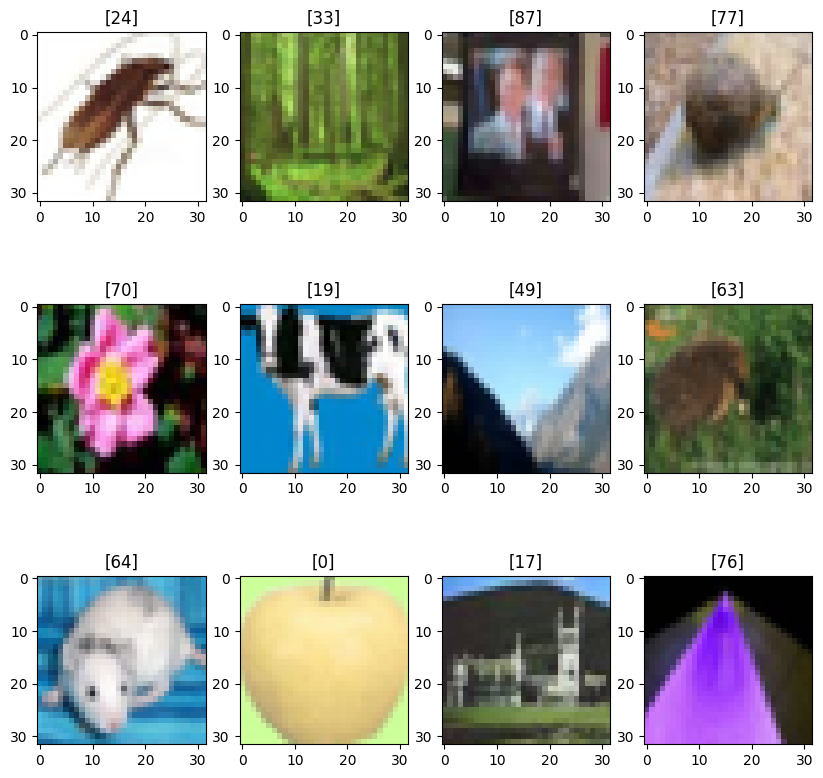

In [6]:
import matplotlib.pyplot as plt
def show_samples(data, labels):
	plt.subplots(figsize=(10, 10))
	for i in range(12):
		plt.subplot(3, 4, i+1)
		k = np.random.randint(0, data.shape[0])
		plt.title(labels[k])
		plt.imshow(data[k])
	plt.show()
show_samples(x_train, y_train)

In [7]:
#assign the batch_size
batchsize = 128
#assign the number of classes
num_classes = 100
#define epoch
epoch= 10
#define rows and columns
img_rows, img_cols = 32, 32


In [8]:
#Shape of the x_train data
x_train.shape

(50000, 32, 32, 3)

In [9]:
#Shape of the x_test data
x_test.shape


(10000, 32, 32, 3)

In [10]:
# reshape the training datas and testing data
new_shape = (50000, 32*32*3)
new_shape1 = (10000, 32*32*3)
x_train_reshaped = x_train.reshape(new_shape)
x_test_reshaped = x_test.reshape(new_shape1)


In [11]:
#Sequential is to build the model layer by layer
model = tf.keras.models.Sequential()
#First layer
model.add(Conv2D(128, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
#Hidden layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))

model.add(Conv2D(16, (3, 3), activation='relu'))
#model.add(Conv2D(32, (3, 3), activation='relu'))

#model.add(Conv2D(32, (3, 3), activation='relu'))
#model.add(Conv2D(32, (3, 3), activation='relu'))

#model.add(Conv2D(32, (3, 3), activation='relu'))
#model.add(Conv2D(32, (3, 3), activation='relu'))
#pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
#dense is used to represents fully connected layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


In [12]:
#To show the denmenssions
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 activation (Activation)     (None, 32, 32, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        73792     
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 16)        4624      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                        

In [13]:
#Compile the model to train the datas
model.compile(loss='categorical_crossentropy',optimizer='nadam',metrics=['accuracy'])


In [14]:
#Converting the numerical to float
x_train_reshaped = x_train_reshaped.astype('float32')
x_test_reshaped= x_test_reshaped.astype('float32')


In [15]:
x_train_reshaped

array([[255., 255., 255., ..., 138., 173.,  79.],
       [255., 255., 255., ..., 255., 255., 255.],
       [250., 250., 248., ..., 232., 230., 228.],
       ...,
       [248., 244., 242., ..., 204., 205., 205.],
       [156., 154., 137., ..., 163., 154., 126.],
       [ 31.,  67., 122., ...,  40.,  37.,  67.]], dtype=float32)

In [16]:
#Divide the pixels range form 0 to 1
x_train_reshaped /= 255
x_test_reshaped /= 255


In [17]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)


In [18]:
print(x_test_reshaped.shape)
print(y_test_one_hot.shape)
print(x_train_reshaped.shape)
print(y_train_one_hot.shape)

(10000, 3072)
(10000, 100)
(50000, 3072)
(50000, 100)


In [19]:

model.fit(x_train, y_train_one_hot, batch_size=batchsize , epochs=epoch, validation_data=(x_test, y_test_one_hot))


Epoch 1/10
391/391 [==============================] - 25s 30ms/step - loss: 4.7427 - accuracy: 0.0178 - val_loss: 4.4141 - val_accuracy: 0.0471
Epoch 2/10
391/391 [==============================] - 11s 28ms/step - loss: 4.3740 - accuracy: 0.0518 - val_loss: 4.0572 - val_accuracy: 0.1090
Epoch 3/10
391/391 [==============================] - 11s 28ms/step - loss: 3.8056 - accuracy: 0.1306 - val_loss: 3.3853 - val_accuracy: 0.2053
Epoch 4/10
391/391 [==============================] - 11s 28ms/step - loss: 3.3888 - accuracy: 0.1962 - val_loss: 3.1612 - val_accuracy: 0.2458
Epoch 5/10
391/391 [==============================] - 11s 29ms/step - loss: 3.1513 - accuracy: 0.2352 - val_loss: 2.9875 - val_accuracy: 0.2814
Epoch 6/10
391/391 [==============================] - 11s 28ms/step - loss: 2.9618 - accuracy: 0.2699 - val_loss: 2.9179 - val_accuracy: 0.2936
Epoch 7/10
391/391 [==============================] - 11s 29ms/step - loss: 2.8124 - accuracy: 0.2978 - val_loss: 2.8505 - val_accuracy:

In [20]:
model.save('Cifar__CNN.h5')

In [21]:
p=model.predict(x_train)
p


1563/1563 [==============================] - 4s 2ms/step


array([[1.6808170e-03, 3.1325342e-03, 1.6211877e-02, ..., 4.7521065e-03,
        1.7617423e-02, 4.6439902e-03],
       [1.5789701e-07, 7.7505047e-07, 9.4899660e-06, ..., 9.0180249e-05,
        5.0956027e-05, 1.4142805e-06],
       [5.9282720e-02, 4.4117108e-02, 2.7341591e-03, ..., 6.2392108e-05,
        1.0461918e-03, 8.4352056e-03],
       ...,
       [1.0583817e-02, 3.2638371e-04, 2.7882913e-04, ..., 6.9807778e-04,
        2.9732909e-03, 4.4578107e-04],
       [1.1253111e-03, 4.8859403e-03, 1.6677831e-03, ..., 4.5119741e-04,
        2.4636153e-03, 2.7360427e-03],
       [4.2637751e-07, 3.4460978e-04, 1.6090436e-05, ..., 5.1097032e-07,
        1.8525085e-05, 5.3696260e-03]], dtype=float32)

In [22]:
p[0]

array([0.00168082, 0.00313253, 0.01621188, 0.00886201, 0.00804292,
       0.04686971, 0.01280769, 0.00900418, 0.02748993, 0.00685911,
       0.00288634, 0.00629384, 0.0030545 , 0.00644669, 0.01837348,
       0.05251122, 0.01227724, 0.00438253, 0.025717  , 0.04346542,
       0.00326128, 0.01082906, 0.00619754, 0.00080947, 0.01036937,
       0.00326471, 0.01011349, 0.00742521, 0.00125794, 0.01081734,
       0.00103099, 0.00671208, 0.01111086, 0.00485278, 0.02079482,
       0.00853695, 0.00661832, 0.0234351 , 0.023785  , 0.00388628,
       0.00500813, 0.00148766, 0.00983336, 0.0354808 , 0.00872779,
       0.01561026, 0.01539536, 0.00359576, 0.00724144, 0.00093481,
       0.00557579, 0.00473395, 0.00243033, 0.00110667, 0.00790602,
       0.01735346, 0.00924989, 0.00401405, 0.00120506, 0.00363329,
       0.00019324, 0.00218867, 0.00082285, 0.00239609, 0.00472264,
       0.01329776, 0.00932094, 0.00063865, 0.00233077, 0.00181411,
       0.0033917 , 0.00049209, 0.006015  , 0.00174862, 0.00407

In [33]:
arr=np.argmax(p[9])

In [34]:
arr

31

In [35]:
y_train[9][0]

31

In [36]:
model.save('cifar_Cnn.h5')